In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.metrics import r2_score

# Multivariate Linear Regression

## Quick refresher

The general form of a multivariate regression is

$$
y \approx w_{0} +
w_{1} x_{1} + w_{2} x_{2} + \cdots + w_{p}x_p
$$

where $y$ is the response vector and $x_{1},…,x_{p}$ are the features (covariates). 
Each of the predictor variables must be numerical. 
The parameters (coefficients) $w_0,…,w_p$ correspond to the *effect* of each feature after taking account of the effect of all other features in the model. 

It is convenient to write this in matrix form where all the values of the forecast variable are given in a single equation. 

$$
X = \left[\begin{matrix} 1 & x_{1,1} & x_{2,1} & \dots & x_{p,1}\\ 1 & x_{1,2} & x_{2,2} & \dots & x_{p,2}\\ \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{1,n} & x_{2,n} & \dots & x_{p,n} \end{matrix}\right].
$$

The first column correspond to the intercept ($w_0$) which does not multiply a feature.

The problem then becomes one of finding $w\in\mathbb R^p$ such that $y\approx Xw$ or, in other words,

$$
w^\star \quad\!\!=\quad\!\! \arg\min_w\|y-Xw\|_2^2
$$

## Loading the data + first look

* Load the data `bikes.csv`, have a look at it, 
* extract the columns `temperature`, `humidity` and `windspeed` to form the feature matrix
* extract the column `count` to form the response matrix

**Note**: you do not need to add a column of $1$ to the feature matrix, this is done automatically by Sklearn

In [3]:
#com+ load the data and extract the feature matrix and the response as matrices/vectors
#hide
bikes_df = pd.read_csv('data/bikes.csv')
X = bikes_df[['temperature', 'humidity', 'windspeed']].values
y = bikes_df['count'].values
#/hide

Use a scatter matrix to have a look at the data, what can you observe?

**Note** you can use [pandas' scatter matrix](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot).

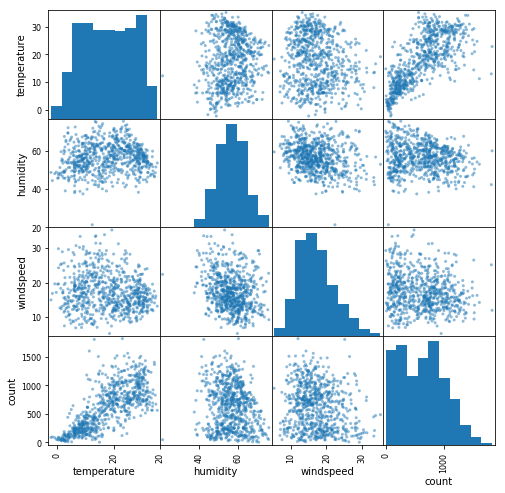

In [4]:
#com+ add your code here to show a scatter 
#hide
pd.plotting.scatter_matrix(bikes_df, figsize=(8, 8));
#/hide

The last rows shows the relation between each feature and the number of bikes hired per day. 
It's hard to see any particular pattern in humidity and windspeed, while temperature definitely has a strong relation with the bikes hired.

Display the correlation coefficient (use `np.corrcoef`) between each of the three covariates and the response. 
(Cf [the documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) for `corrcoef`)

In [5]:
#com+ add your code here
#hide
for covariate in ['temperature', 'humidity', 'windspeed']:
    print('Correlation coefficient for {0}: {1:.3f}'.format(
        covariate, np.corrcoef(bikes_df[covariate], bikes_df['count'])[0,1]))
#/hide

Correlation coefficient for temperature: 0.741
Correlation coefficient for humidity: -0.149
Correlation coefficient for windspeed: -0.163


The correlation coefficients confirm that the number of bikes hired is strongly correlated with the temperature. There also seems to be a smaller effect for humidity and windspeed. 
This makes sense intuitively; the better the weather is, the more likely people will want to go cycling. 
Now that you have a “feel” for the relationships between the two features and the response variable, you have a frame of reference when developing the regression model.

## Fitting a linear regression

Sklearn offers the `LinearRegression` from `sklearn.linear_model`. 
(Note that `sklearn.linear_model` has **a lot** of models to offer a few of which we will cover). 
Import it and have a look at the documentation using the question mark. 
Then, create an instance, fit it (on the whole data, exceptionally we will ignore the train-test-split step). 

In [6]:
#com+ add your code here to apply and fit a linear regression
#hide
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
#/hide

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Have a look at the coefficients 

* `.coef_` will give you the coefficients for the actual covariates ($w_1, \dots, w_p$)
* `.intercept_` will give you the coefficient for the bias term ($w_0$)

In [7]:
#com+ add your code to display the coefficients
#hide
print("Coefficient for the bias term: {0:.3f}".format(linear_regression.intercept_))
print("Coefficients for the covariates: {}".format(linear_regression.coef_))
#/hide

Coefficient for the bias term: 951.098
Coefficients for the covariates: [ 32.20562982 -13.1889119   -8.9870707 ]


## Does the model match the data well?

You can get the model to predict values you may be interested in using the `.predict`. For example, what does your model suggest for the number of bikes hired at 20 degrees, 60% humidity and normalised windspeed 10?

In [8]:
#com+ add your code here
#hide
x = np.array([[20, 60, 10]]) # single observation
print("Bikes hired at 20 degrees, 60% humidity, 10 normalised wsp: {0:.0f}".format(
    linear_regression.predict(x)[0]))
#/hide

Bikes hired at 20 degrees, 60% humidity, 10 normalised wsp: 714


Let's get `y_pred`, the prediction on the original data. Then display 

* the true counts vs the temperature
* the predicted counts vs the temperature

does it work well? 

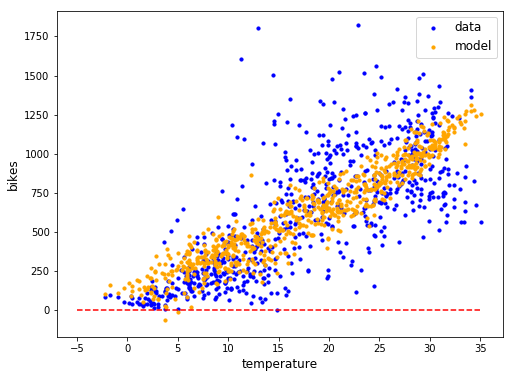

In [10]:
#com+ add your code here
#hide
y_pred = linear_regression.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(bikes_df.temperature, y, s=10, color='blue', label="data")
plt.scatter(bikes_df.temperature, y_pred, s=10, color='orange', label="model")
plt.xlabel('temperature', fontsize=12)
plt.ylabel('bikes', fontsize=12)
plt.legend(fontsize=12)

# does it make sense to have negative predictions?
xx = np.linspace(-5, 35, 10)
yy = xx*0
plt.plot(xx, yy, color='red', ls="--")
#/hide

In this case we see that the model picks up a trend but the model is likely too simple to really capture the information contained in the data. 

**Question**: why are the predictions not on a straight line?

## Under the hood of Linear Regression (Bonus)

Sklearn chooses the optimal vector of parameters $w$ when the loss is the $2$-norm. Another way to write it is that the coefficients recovered minimise the *mean squared error* (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

where $\hat{y}_i$ are the predictions obtained by computing $\langle x_i, w\rangle$. This is equivalent to finding the $w$ that minimises the $2$-loss:

$$
w_\text{OLS} \quad\!\!=\quad\!\! \arg\min_w \,\,\| y - Xw\|_2
$$

The solution to this problem can be obtained using the function `lstsq` (least squares) from `numpy.linalg`. 

**Tasks**
* Compute the feature matrix adding a column of $1$
* solve the problem $y\approx Xw$ in the least-square sense by using `numpy.linalg.lstsq`
* compare the results with the coefficients obtained from SkLearn

In [11]:
#com+ add your code here
#hide
XX = np.zeros((X.shape[0], X.shape[1]+1))
XX[:, :-1] = X
XX[:, -1] = np.ones(X.shape[0])

w = np.linalg.lstsq(XX, y)[0]

print("Via LSTSQ: {}".format(w))
print("Via SKLEARN: {}, {}".format(linear_regression.coef_, linear_regression.intercept_))
#/hide

Via LSTSQ: [  32.20562982  -13.1889119    -8.9870707   951.0975584 ]
Via SKLEARN: [ 32.20562982 -13.1889119   -8.9870707 ], 951.0975584012325


### Residuals diagnostic

When a Linear regression model is properly working we have that the difference between predictions and targets should not present any particular structure. To study this, we introduce the concept of residual. A residual can be defined as follows:

$$
r = y-\hat y
$$

Where $\hat y$ is the prediction made by the model and $y$ is the response.

Have a look for the bike dataset, what do you observe? 

Text(0,0.5,'Residuals')

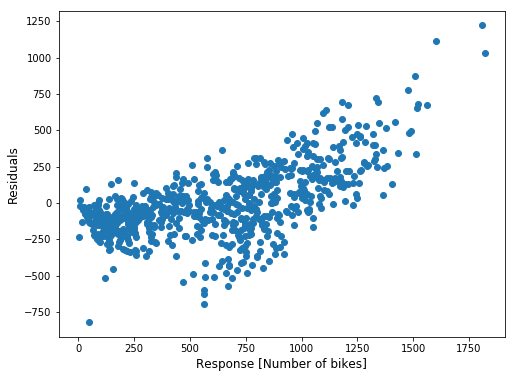

In [12]:
#com+ add your code to display the residuals vs the response 
#hide
r = (y-y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y, r)
plt.xlabel("Response [Number of bikes]", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
#/hide

### Looking at another dataset

We will re-do these steps with a few variations on a different dataset.

Load the `auto.csv` dataset, note that the missing values are encoded as `?` and should be dropped. Extract the columns `displacement`, `horsepower` and `weight` for the feature matrix and `mpg` as the response. 

In [13]:
#com+ your code here
#hide
cars_data = pd.read_csv('data/auto.csv', na_values='?').dropna()
X = cars_data[['displacement', 'horsepower', 'weight']]
y = cars_data['mpg']
#/hide

Fit a linear model, specify `normalize=True` so that the data is scaled before applying the regression and compute the residuals.

In [14]:
#com+ your code here
#hide
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X, y)
y_pred = linear_regression.predict(X)
res = y - y_pred
#/hide

A plot of the residuals against the fitted values should show no pattern. 
If a pattern is observed, it means that the model is not able to fully capture the information in the data. 
To overcome this problem, a transformation of the forecast variable (such as a log transformation) may help.

Plot the residuals against the response and discuss whether there is a pattern

Text(0,0.5,'residuals')

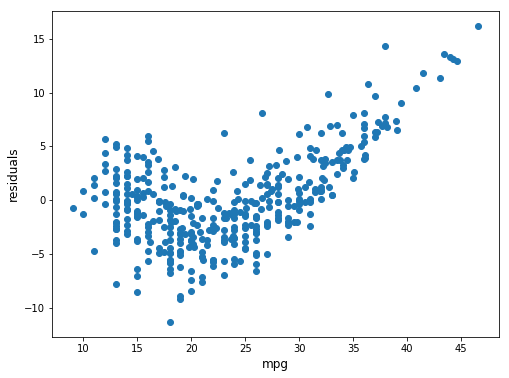

In [15]:
#com+ your code here
#hide
plt.figure(figsize=(8, 6))
plt.scatter(y, res)
plt.xlabel('mpg', fontsize=12)
plt.ylabel('residuals', fontsize=12)
#/hide

The plot seems to show a systematic pattern as the variation in the residuals changes with the response, additionally there seems to be an upward pattern. 

To explore this further, we can do a scatterplot of the residuals against each predictor in the model to test whether a pattern can be observed there.
If these scatterplots show a pattern, the relationship may be nonlinear (or better explained by a nonlinear model). 

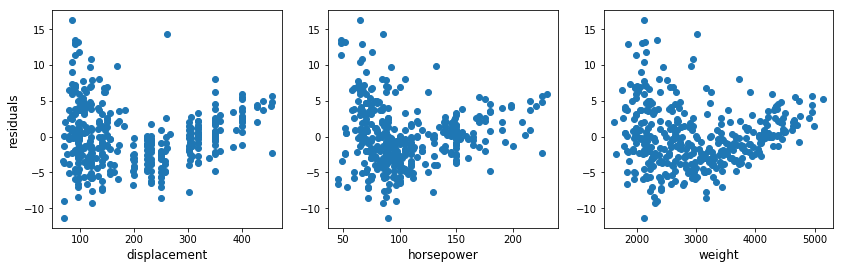

In [16]:
#com+ show the scatterplots of the residuls vs the features
#hide
plt.figure(figsize=(14, 4))
for idx, feat in enumerate(X.columns):
    plt.subplot(1, 3, idx+1)
    plt.scatter(X[feat], res)
    plt.xlabel(feat, fontsize=12)
    if idx==0:
        plt.ylabel('residuals', fontsize=12)
#/hide

### Adding non-linear features

The charts suggest a nonlinear relationship between the features and the residuals. 
One thing we could do is add transformed features. 
For example the log of the features (note that all the features are positive so this does not cause issues).  

The first part of the cell is a **FeatureUnion**, it allows to combine derived features. 
It is extremely convenient and, combined with **Pipeline** can bring a lot of flexibility to your models. 
This will be covered in much more details tomorrow, for now try to get an intuition for what it does.

In [17]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

feat_union = FeatureUnion([
    ('identity', FunctionTransformer()),
    ('log-transform', FunctionTransformer(np.log))])

X2 = feat_union.fit_transform(X)

print("Before: {}".format(X.shape))
print("After: {} (with log features)".format(X2.shape))

Before: (392, 3)
After: (392, 6) (with log features)


Now that we have an extended dataset, fit a Linear regression again.
The model now looks like:
   
\begin{eqnarray}
\text{mpg} &=& w_0 + w_1 \times \text{displacement} + w_2\times \text{horsepower} + w_3\times \text{weight}+\\
&& w_4\times\log(\text{displacement}) + w_5\times\log(\text{horsepower}) + w_6\times\log(\text{weight})
\end{eqnarray}

Apply this model (with normalisation) and show the scatterplots of the residuals vs each feature + vs the response. What do you observe? 

Text(0.5,0,'response')

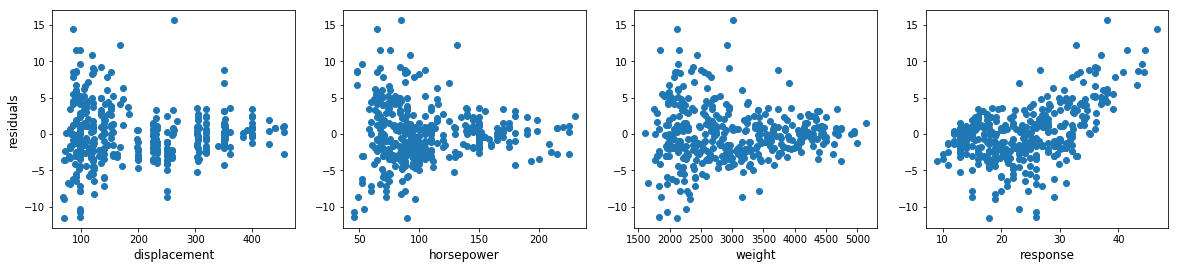

In [18]:
#com+ your code here
#hide
linreg2 = LinearRegression(normalize=True)
linreg2.fit(X2, y)
res2 = y - linreg2.predict(X2)

plt.figure(figsize=(20, 4))
for idx, feat in enumerate(X.columns):
    plt.subplot(1, 4, idx+1)
    plt.scatter(X[feat], res2)
    plt.xlabel(feat, fontsize=12)
    if idx==0:
        plt.ylabel('residuals', fontsize=12)
        
plt.subplot(1, 4, 4)
plt.scatter(y, res2)
plt.xlabel("response", fontsize=12)
#/hide

In terms of the residuals vs features, it clearly looks better in terms of the *trend*. The residuals still seem to show a pattern vs the response but much decreased.

Something to note here is that the **variance** of the residuals seems to be correlated with the features. This also indicates that the model doesn't fully capture the information in the data.

More could be done to try to get a better model but, by now, you should have an idea for what goes on when fitting a regression model and trying to assess its quality.

## Quality assessment: the R-squared

As you have seen, the R-squared (R2) is a measure of fit quality when applying a linear regression.
It is obtained by comparing the RSS to the TSS:

$$
R^2 = 1-{RSS \over TSS}
$$

where

* the RSS is the squared norm of the residual vector
* the TSS is the squared norm of the centered response vector 

**Tasks**

* compute the RSS
* compute the TSS
* compute the R2 (you should get something around `0.7`)

In [20]:
#com+
#hide
centered_response = (y - y.mean())

RSS = np.linalg.norm(res)**2
TSS = np.linalg.norm(centered_response)**2

print("R-squared: {0:.4f}".format(1-RSS/TSS))
#/hide

R-squared: 0.7070


This metric is fairly easy to interpret:

- it's close to 1 if the model explains much of the variance.
- it's close to 0 if the model explains little of the variance.

***Question***: can this value be negative or more than 1?